# 2. ANÁLISIS DESCRIPTIVO ESTADÍSTICO

In [1]:
import pandas as pd

In [2]:
# Importamos nuestro .csv desde nuestro directorio
df = pd.read_csv('/workspaces/EDA_3/data/raw/medical_insurance_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Tiramos un .desribe() para una visualización general de la distrinución
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observamos que prácticamente todas las columnas son numéricas, pero también las tenemos categóricas.

Por ello, para poder realizar el análisis de las estadísticas descriptivas, pasaremos todas las categóricas a numéricas factorizándolas con la función incluida en python. Sin embargo, en el caso de la MODA, nos interesa mantener el string de este resultado y es por eso que creamos previa a la facotrización una lista con todas ellas.

In [4]:
modes =[] 

def get_mode(column):
    modes.append(df[column].mode())

for i in df.columns:
    get_mode(i)

modes

[0    18
 Name: age, dtype: int64,
 0    male
 Name: sex, dtype: object,
 0    32.3
 Name: bmi, dtype: float64,
 0    0
 Name: children, dtype: int64,
 0    no
 Name: smoker, dtype: object,
 0    southeast
 Name: region, dtype: object,
 0    1639.5631
 Name: charges, dtype: float64]

In [5]:
num_list = [
    "sex",
    "smoker",
    "region"
    ]

In [6]:
# Creamos una función que factoriza los valores insertados
def factor(column):
    df[column] = pd.factorize(df[column])[0]

# Creamos otra función que nos almacenará el nombre de las etiquetas en una lista
tag_list = []
def tags (column):
    tag_string = pd.factorize(df[column])[1]
    tag_list.append(tag_string)



# Creamos un nuevo DataFrame con solo las columnas no numéricas
df_no_numericas = df[num_list]

# Iteramos sobre esta lista para pasar cada elemento a las funciones
for i in df_no_numericas:
    tags(i)   
    factor(i)



df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

Hemos creado un código que itera por todas las columnas del dataframe para conseguir un análisis estadístico visual de cada una de las columnas. 

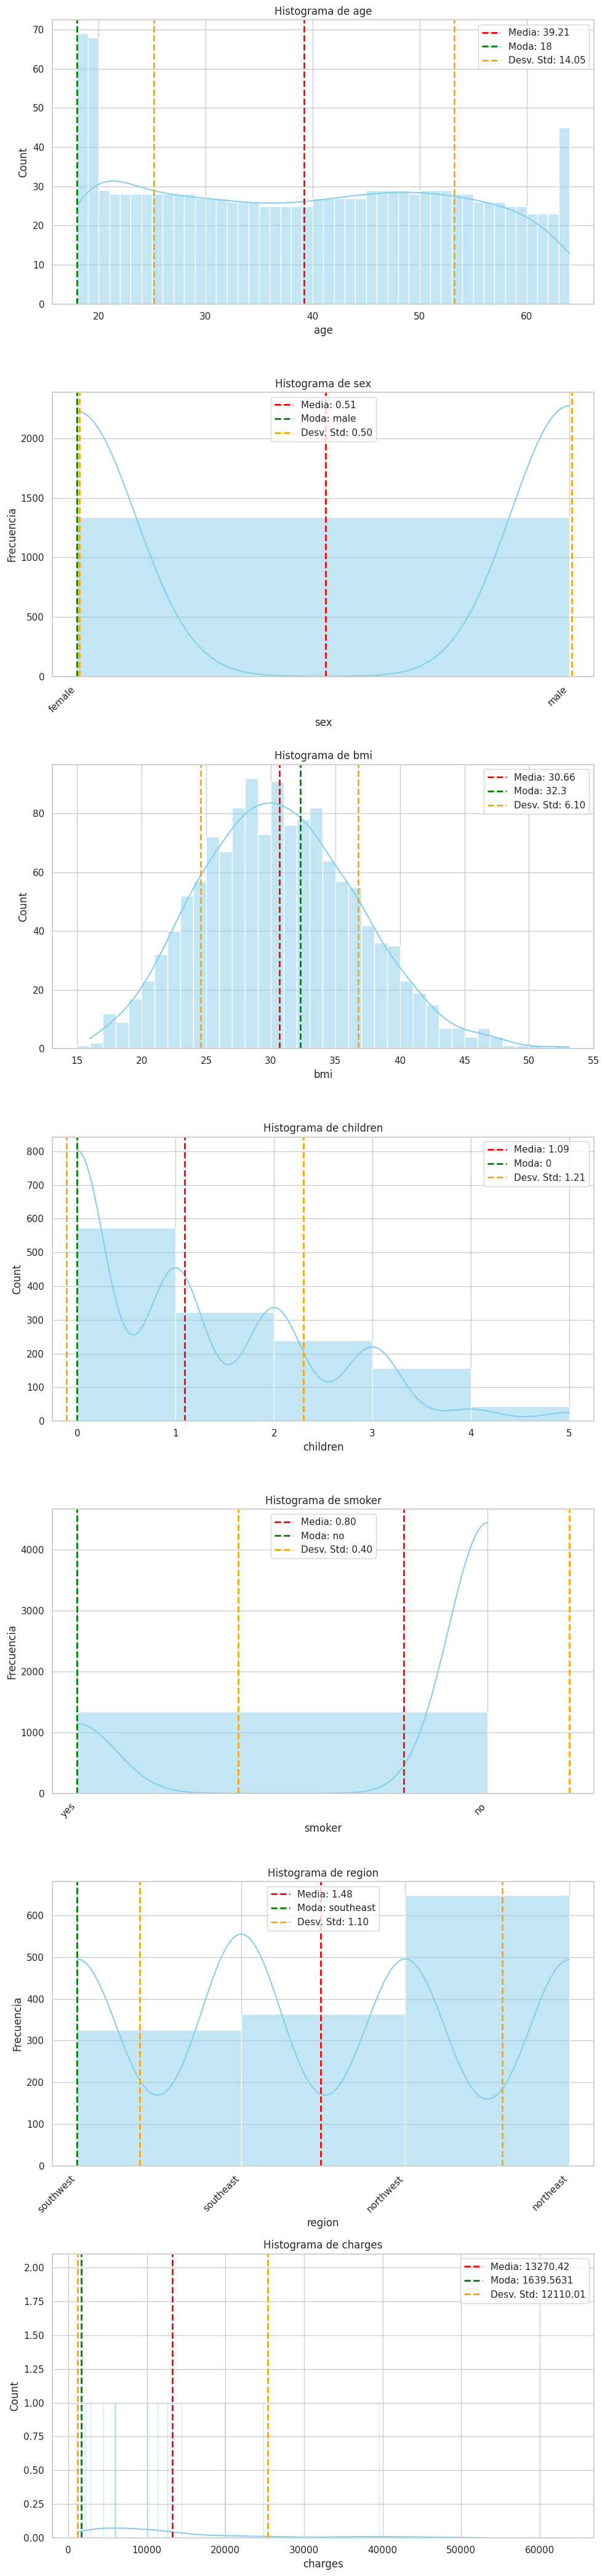

In [8]:
# Lista de nombres de columnas
columnas = df.columns

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Crear subgráficos para cada columna
fig, axes = plt.subplots(nrows=len(columnas), ncols=1, figsize=(10, 6 * len(columnas)))

# Iterar sobre cada columna
for i, col in enumerate(columnas):
    # Calcular la media, moda y desviación estándar
    media = df[col].mean()
    moda = modes[i].iloc[0]  # Puede haber múltiples modas, tomamos la primera
    desviacion = df[col].std()

    # Convertir los valores de los bins a enteros
    bins = range(int(min(df[col])), int(max(df[col])) + 1)

    # Graficar el histograma
    sns.histplot(df[col], bins=bins, kde=True, color='skyblue', ax=axes[i])

    # Línea vertical para la media
    axes[i].axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')

    # Línea vertical para la moda
    axes[i].axvline(moda, color='green', linestyle='dashed', linewidth=2, label=f'Moda: {moda}')

    # Líneas verticales para la desviación estándar
    axes[i].axvline(media + desviacion, color='orange', linestyle='dashed', linewidth=2, label=f'Desv. Std: {desviacion:.2f}')
    axes[i].axvline(media - desviacion, color='orange', linestyle='dashed', linewidth=2)

    axes[i].legend()
    axes[i].set_title(f'Histograma de {col}')

    # Verificar si la columna ha sido factorizada antes de configurar los xticks
    if col in num_list:
        # Obtener las etiquetas factorizadas de la columna
        etiquetas = tag_list[num_list.index(col)]
        
        # Establecer los ticks y etiquetas en el eje x
        axes[i].set_xticks(range(len(etiquetas)))
        axes[i].set_xticklabels(etiquetas, rotation=45, ha="right")

        axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()